In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   horizontal_flip=True,
                                   height_shift_range=0.3,
                                   width_shift_range=0.3,
                                   shear_range=0.2)

In [7]:
train_generator = train_datagen.flow_from_directory(r"/content/drive/MyDrive/Mini Project/Breast Cancer Patients MRI's/train",
                                                    target_size=(32,32),
                                                    class_mode='binary',
                                                    batch_size=32)

Found 1457 images belonging to 2 classes.


In [8]:
valid_datagen = ImageDataGenerator(rescale=1/255)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
valid_generator = valid_datagen.flow_from_directory(r"/content/drive/MyDrive/Mini Project/Breast Cancer Patients MRI's/validation",
                                                    target_size=(32,32),
                                                    class_mode='binary',
                                                    batch_size=32)

Found 482 images belonging to 2 classes.


In [10]:
imgs,labels = next(train_generator)
num_classes = len(train_generator.class_indices)

In [11]:
def plot_images(images_arr):
  fig,axes = plt.subplots(1,12,figsize=(32,32))
  for img,ax in zip(images_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

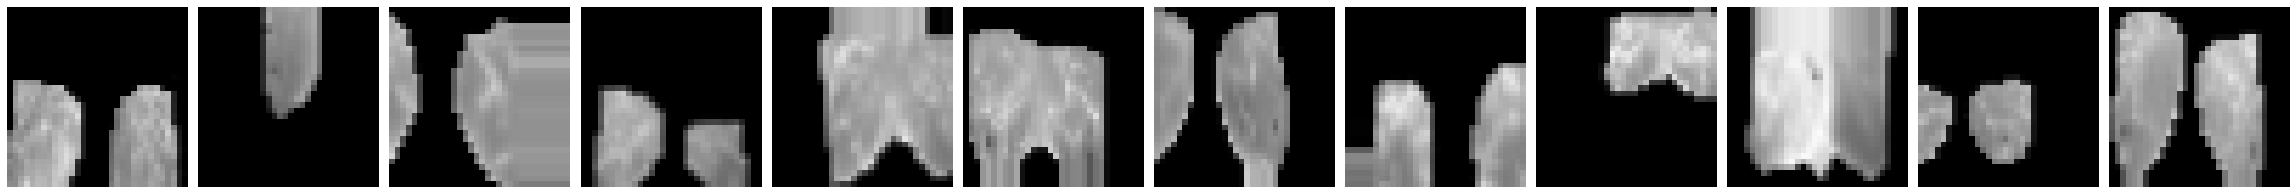

[1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 0.]


In [12]:
plot_images(imgs)
print(labels)

In [13]:
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential

In [14]:
model = Sequential()

In [15]:
model.add(Conv2D(filters=32, kernel_size=3,  activation='relu', input_shape=[32,32,3]))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(BatchNormalization())

In [16]:
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2, strides=2))
model.add(BatchNormalization())

In [17]:
model.add(Flatten())

In [18]:
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.compile(optimizer='RMSprop', 
              loss='binary_crossentropy', 
              metrics=['Accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 15, 15, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                        

In [21]:
history = model.fit(x=train_generator, 
          batch_size=32, 
          epochs=10, 
          validation_data=valid_generator,
          steps_per_epoch=train_generator.n//train_generator.batch_size,)

Epoch 1/10
45/45 [==============================] - 375s 8s/step - loss: 1.8067 - Accuracy: 0.5130 - val_loss: 0.7009 - val_Accuracy: 0.5021
Epoch 2/10
45/45 [==============================] - 5s 113ms/step - loss: 0.7084 - Accuracy: 0.5291 - val_loss: 0.7234 - val_Accuracy: 0.5021
Epoch 3/10
45/45 [==============================] - 5s 113ms/step - loss: 0.7116 - Accuracy: 0.5677 - val_loss: 0.8114 - val_Accuracy: 0.5021
Epoch 4/10
45/45 [==============================] - 5s 113ms/step - loss: 0.6872 - Accuracy: 0.5846 - val_loss: 1.0398 - val_Accuracy: 0.5021
Epoch 5/10
45/45 [==============================] - 5s 113ms/step - loss: 0.6709 - Accuracy: 0.5979 - val_loss: 0.9449 - val_Accuracy: 0.5021
Epoch 6/10
45/45 [==============================] - 5s 113ms/step - loss: 0.6602 - Accuracy: 0.6225 - val_loss: 1.0361 - val_Accuracy: 0.5021
Epoch 7/10
45/45 [==============================] - 5s 115ms/step - loss: 0.6419 - Accuracy: 0.6589 - val_loss: 0.9906 - val_Accuracy: 0.5021
Epoch 8

In [22]:
def plot_graphs(history,string):
  plt.plot(history.history[string], 'b-x', linewidth=3)
  plt.plot(history.history['val_'+string], 'r-o', linewidth=3)
  plt.xlabel('epochs')
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

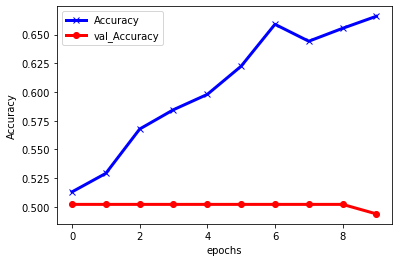

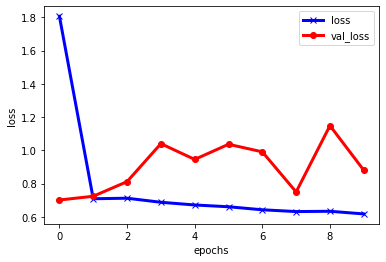

In [23]:
plot_graphs(history,'Accuracy')
plot_graphs(history,'loss')

In [24]:
import os

In [25]:
test_filenames = os.listdir(r"/content/drive/MyDrive/Mini Project/Breast Cancer Patients MRI's/test")
test_df = pd.DataFrame({
    "Filename" : test_filenames
})

In [26]:
total_test = len(test_df)
print('Total Number of images:',total_test)

Total Number of images: 30


In [27]:
test1_datagen = ImageDataGenerator(rescale=1/255)

In [28]:
test1_generator = test1_datagen.flow_from_dataframe(test_df,r"/content/drive/MyDrive/Mini Project/Breast Cancer Patients MRI's/test",
                                                    x_col='Filename',
                                                    class_mode=None,
                                                    target_size=(32,32),
                                                    batch_size=10)

Found 30 validated image filenames.


In [29]:
batch_size=10

In [30]:
predict = model.predict(test1_generator)
                        
print("Number of predicted images:", len(predict), "\n")
print(predict)

Number of predicted images: 30 

[[0.19544938]
 [0.20402522]
 [0.3668694 ]
 [0.3953001 ]
 [0.21409136]
 [0.37914154]
 [0.17284313]
 [0.34441033]
 [0.3635849 ]
 [0.21532485]
 [0.20435952]
 [0.16878153]
 [0.20971507]
 [0.36421168]
 [0.19416213]
 [0.34031564]
 [0.3683571 ]
 [0.3816333 ]
 [0.36099914]
 [0.40342245]
 [0.21479692]
 [0.4145814 ]
 [0.19668627]
 [0.20914797]
 [0.4025913 ]
 [0.20921205]
 [0.38964325]
 [0.38368976]
 [0.17512956]
 [0.19160427]]


In [31]:
results_df = pd.DataFrame(predict)

In [32]:
results_df

,0
0,0.195449
1,0.204025
2,0.366869
3,0.395300
4,0.214091
5,0.379142
6,0.172843
7,0.344410
8,0.363585
9,0.215325


In [33]:
results_df["roundoff"] = round(results_df[0])
print(results_df)

           0  roundoff
0   0.195449       0.0
1   0.204025       0.0
2   0.366869       0.0
3   0.395300       0.0
4   0.214091       0.0
5   0.379142       0.0
6   0.172843       0.0
7   0.344410       0.0
8   0.363585       0.0
9   0.215325       0.0
10  0.204360       0.0
11  0.168782       0.0
12  0.209715       0.0
13  0.364212       0.0
14  0.194162       0.0
15  0.340316       0.0
16  0.368357       0.0
17  0.381633       0.0
18  0.360999       0.0
19  0.403422       0.0
20  0.214797       0.0
21  0.414581       0.0
22  0.196686       0.0
23  0.209148       0.0
24  0.402591       0.0
25  0.209212       0.0
26  0.389643       0.0
27  0.383690       0.0
28  0.175130       0.0
29  0.191604       0.0


In [34]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path,target_size=(32,32))
  x = image.img_to_array(img)
  x = np.expand_dims(x,axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn + " is a malignant")
  else:
    print(fn + " is a beningn")

Saving S_305.jpg to S_305.jpg
[1.]
S_305.jpg is a malignant
